In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

### Carregar os Dados - Regressão Linear

In [3]:
# Carregar o conjunto de dados
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [4]:
# Visualizar estrutura do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [5]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variáveis Grupo Sanguíneo, Fumante, Nível de Atividade
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

### Treinar Modelo de Regressão Linear

In [6]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [7]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [8]:
# Criar o modelo
model_reg = LinearRegression()

In [9]:
# Treinar o modelo
model_reg.fit(X_train, y_train)

LinearRegression()

### Apresentar Plots Shapley Values - Regressão

In [10]:
# Rodar o explainer no conjunto de treinamento
explainer = shap.Explainer(model_reg.predict, X_train)

PermutationExplainer explainer: 701it [00:35, 14.24it/s]                         


.values =
array([[ 2.07488331e-01,  1.95501987e+01, -3.38057027e+01, ...,
        -1.00852867e+00, -1.40900299e-01, -3.77527076e-01],
       [ 1.03521379e-01,  2.50201767e+01, -5.13811399e+00, ...,
         4.11934244e-01,  2.86070304e-01, -3.77527076e-01],
       [-2.67789163e-01, -8.96007263e+01,  2.79398730e+01, ...,
        -1.00852867e+00, -1.40900299e-01, -3.77527076e-01],
       ...,
       [ 1.18373801e-01, -2.09773657e+01,  1.69138774e+01, ...,
        -1.00852867e+00, -1.40900299e-01, -3.77527076e-01],
       [-2.97494006e-01,  4.38344147e+00,  3.68268256e+00, ...,
        -1.00852867e+00, -1.40900299e-01, -3.77527076e-01],
       [-8.95601026e-02,  8.04658630e+01, -3.38057027e+01, ...,
         4.11934244e-01,  2.86070304e-01, -3.77527076e-01]])

.base_values =
array([195.84732576, 195.84732576, 195.84732576, 195.84732576,
       195.84732576, 195.84732576, 195.84732576, 195.84732576,
       195.84732576, 195.84732576, 195.84732576, 195.84732576,
       195.84732576, 195.847

In [11]:
# Calcular Shapley Values no Conjunto de Testes
shap_values = explainer(X_test)

PermutationExplainer explainer: 301it [00:14,  6.08it/s]                         


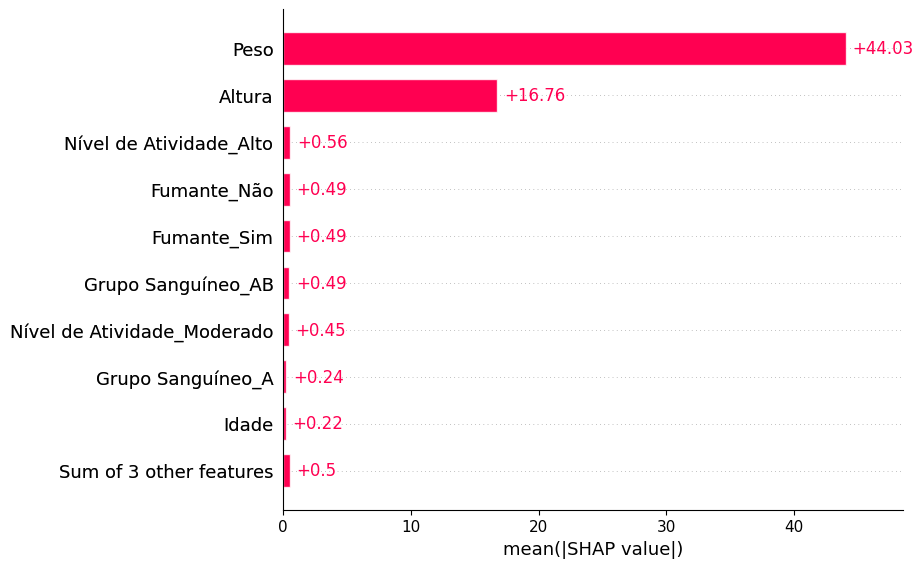

In [26]:
# Plotar a importância geral por Shapley Values
shap.plots.bar(shap_values)

In [18]:
# Mostrar 1a instância do conjunto de testes
X_test.iloc[0,:]

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

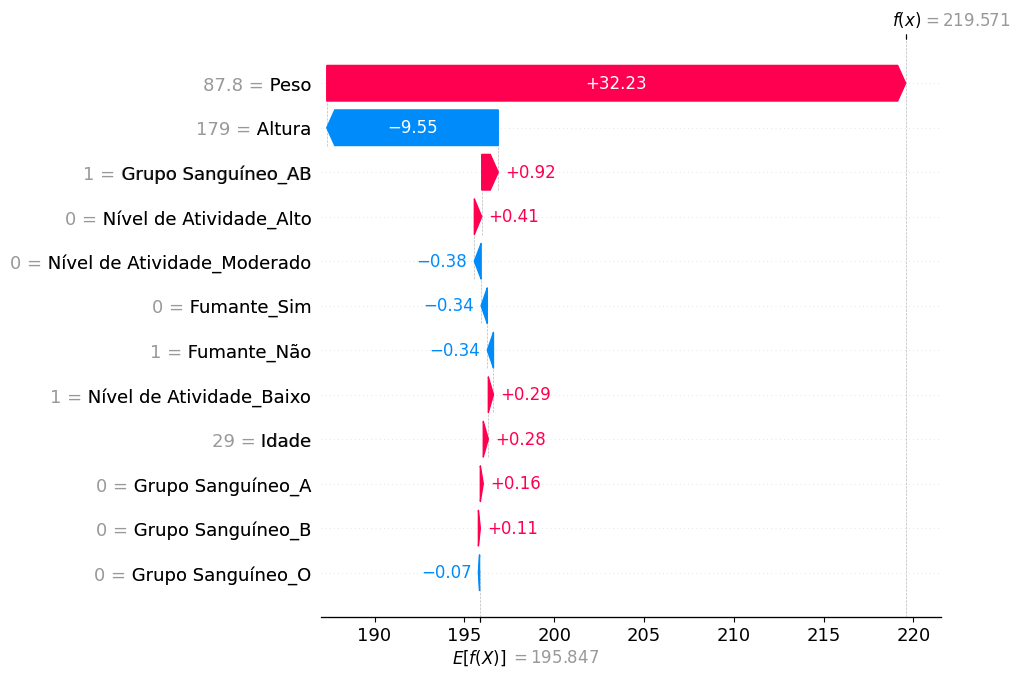

In [28]:
# Plotar os SHAP values para um exemplo
shap.plots.waterfall(shap_values[0], max_display=13)

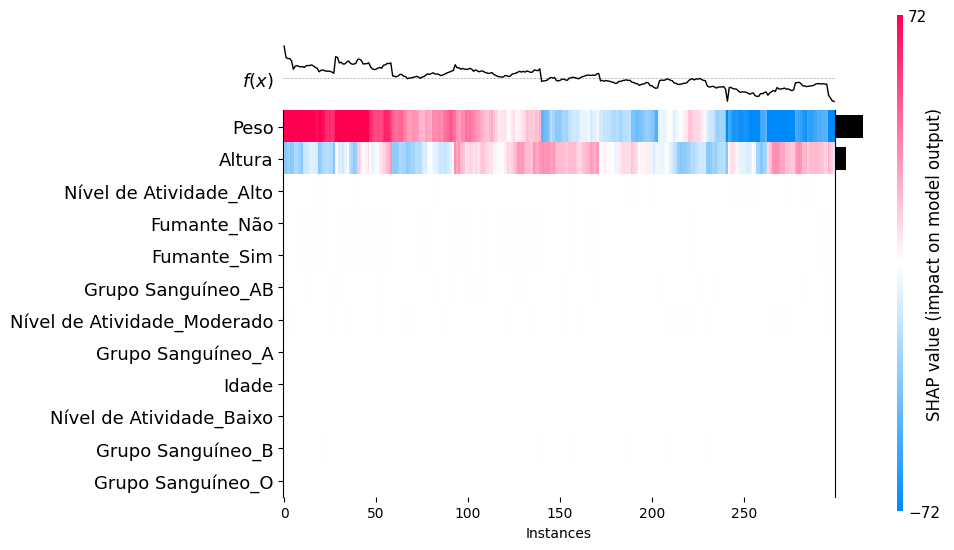

In [34]:
# Plotar os SHAP values para um exemplo
shap.plots.heatmap(shap_values, max_display=13)

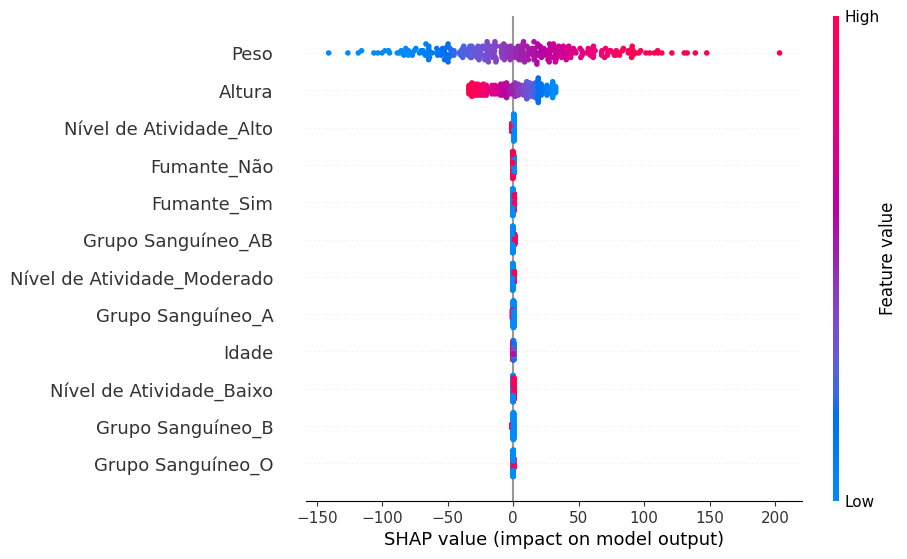

In [36]:
shap.plots.beeswarm(shap_values,max_display=13)

### Carregar Dados Regressão Logística

In [38]:
# Carregar o conjunto de dados
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [39]:
# Visualizar estrutura do conjunto de dados
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [40]:
# Ajustar DataFrame

# Remover a coluna 'Id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

### Treinar Modelo de Regressão Logística

In [41]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [42]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [43]:
# Treinar o modelo de regressão logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### Apresentar Plots Shapley Values - Classificação

In [44]:
# Rodar o explainer no conjunto de treinamento
explainer = shap.Explainer(model_lr.predict, X_train)

In [45]:
# Calcular Shapley Values no Conjunto de Testes
shap_values = explainer(X_test)

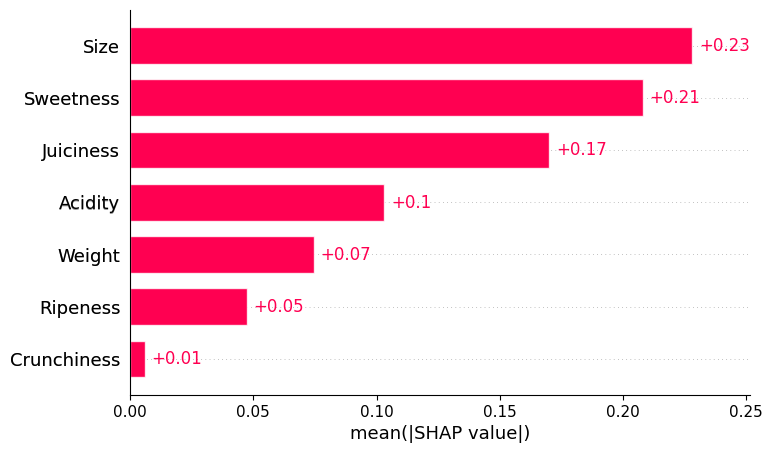

In [46]:
# Plotar a importância geral por Shapley Values
shap.plots.bar(shap_values)

In [47]:
# Mostrar 1a instância do conjunto de testes
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

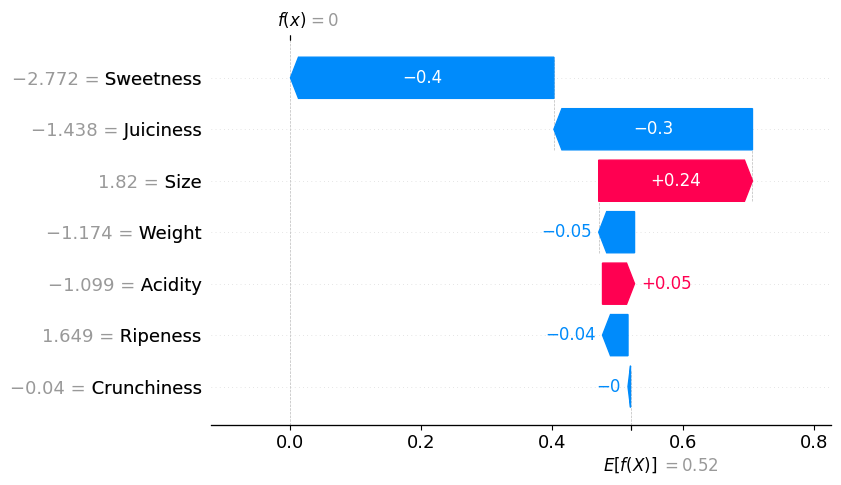

In [49]:
# Plotar os SHAP values para um exemplo
shap.plots.waterfall(shap_values[0])

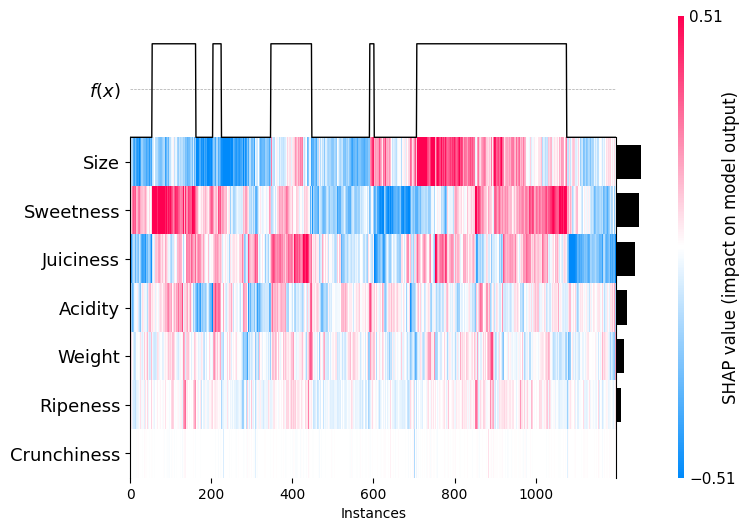

In [50]:
# Plotar os SHAP values - Heatmap
shap.plots.heatmap(shap_values)

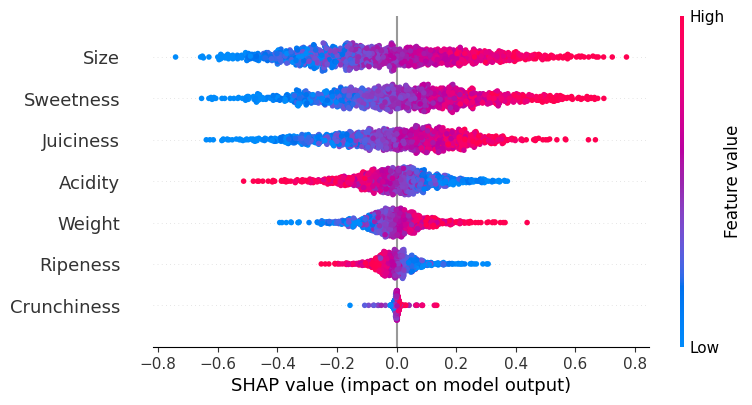

In [51]:
shap.plots.beeswarm(shap_values)